In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor,BaggingRegressor, StackingRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Shape

In [3]:
df.shape

(500, 9)

### Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Description

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Dropping columns

In [6]:
df.drop(columns={'Serial No.','Research'},inplace=True)

### Renaming columns

In [7]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance of Admit '],
      dtype='object')

In [8]:
df.rename(columns={'GRE Score':'GRE_Score','TOEFL Score':'TOEFL_Score','University Rating':'University_Rating','Chance of Admit ':'Chance_of_Admit'},inplace=True)

### checking null percentage

In [9]:
df.isnull().mean()*100

GRE_Score            0.0
TOEFL_Score          0.0
University_Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Chance_of_Admit      0.0
dtype: float64

### checking duplicates

In [10]:
df.duplicated().sum()

0

## <center> EDA

### Univariate analysis

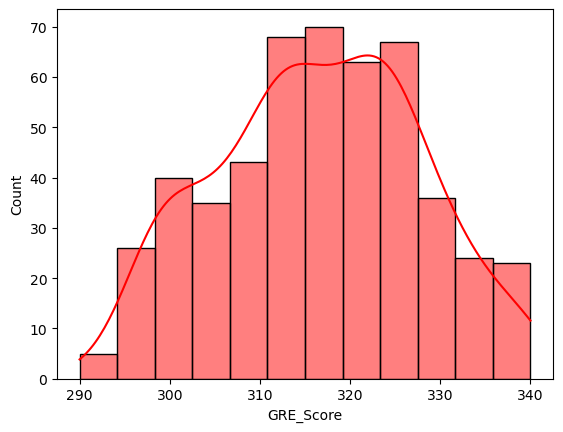

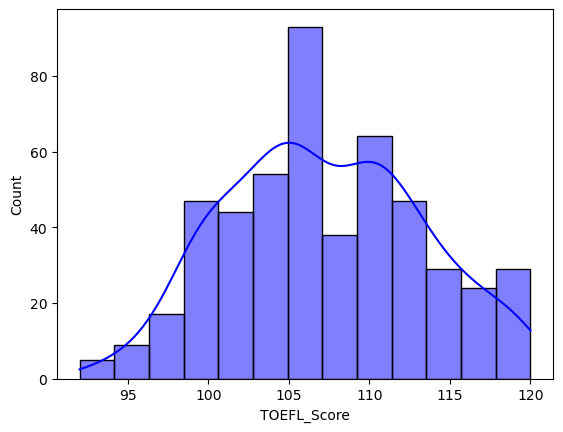

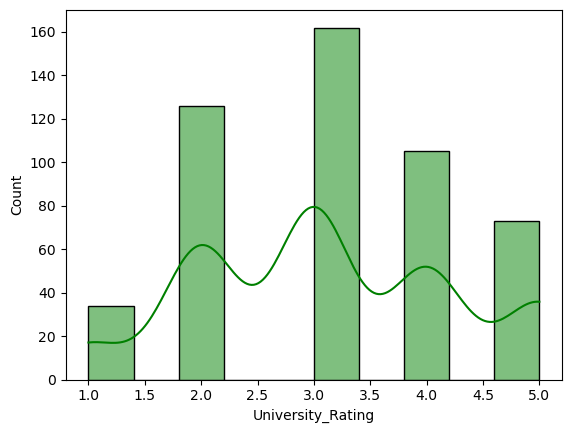

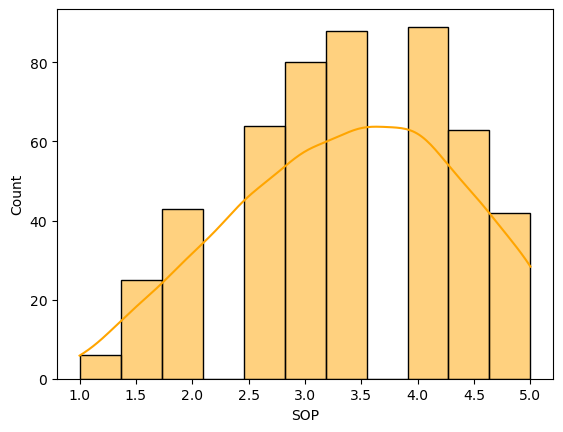

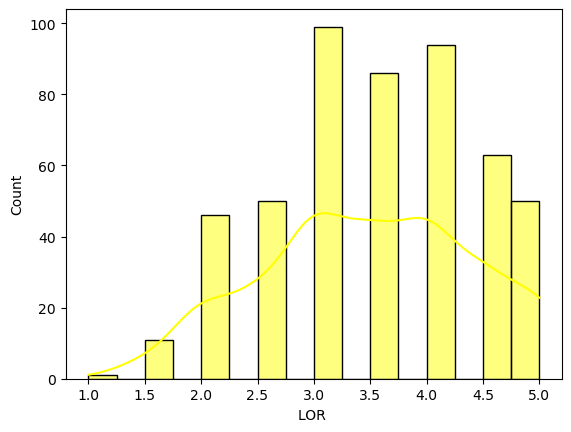

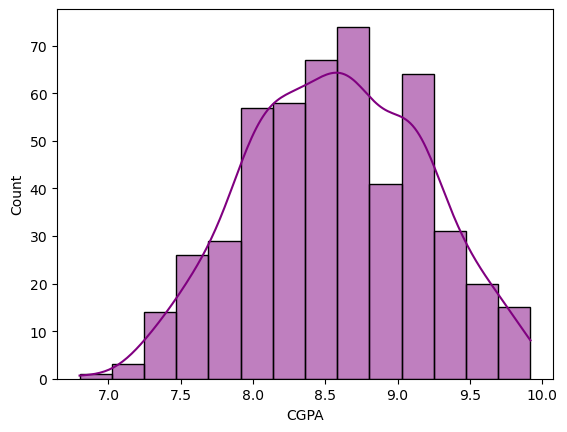

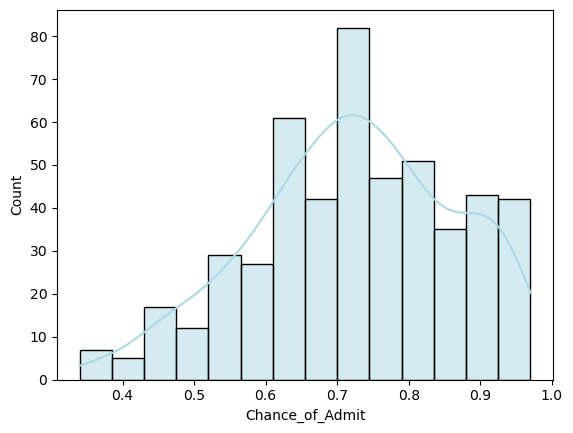

In [11]:
columns = ['Red', 'Blue', 'Green', 'Orange', 'Yellow', 'Purple', 'lightblue']
for i in range(len(df.columns)):
    sns.histplot(data=df, x=df.columns[i], kde=True, color=columns[i % len(columns)])
    plt.show()


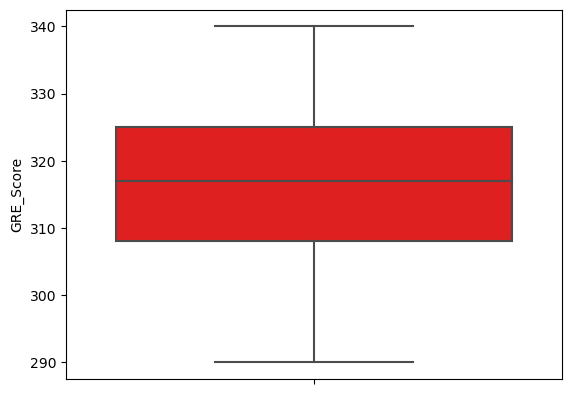

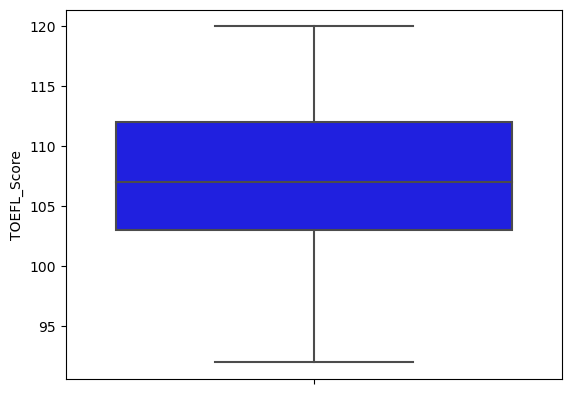

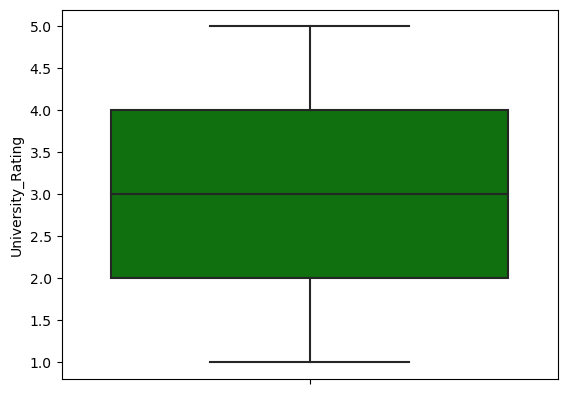

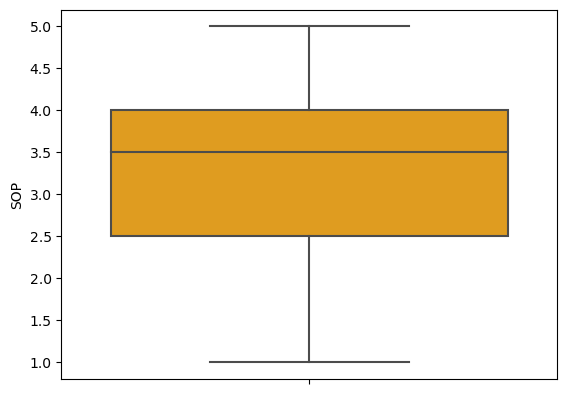

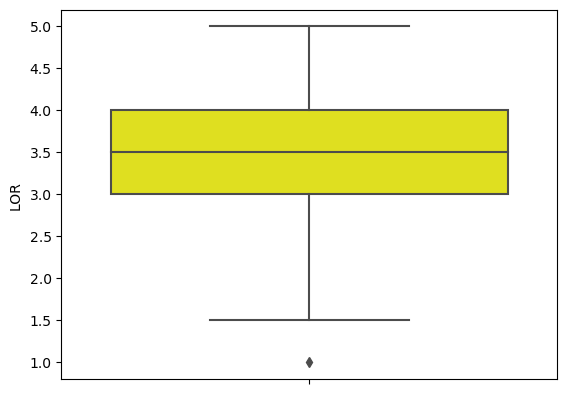

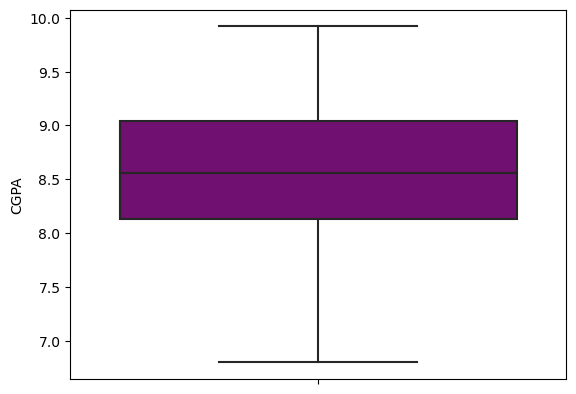

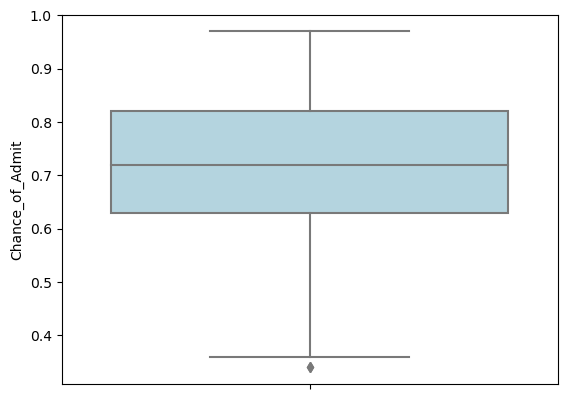

In [12]:
columns = ['Red', 'Blue', 'Green', 'Orange', 'Yellow', 'Purple', 'lightblue']
for i in range(len(df.columns)):
    sns.boxplot(data=df, y=df.columns[i],  color=columns[i % len(columns)])
    plt.show()

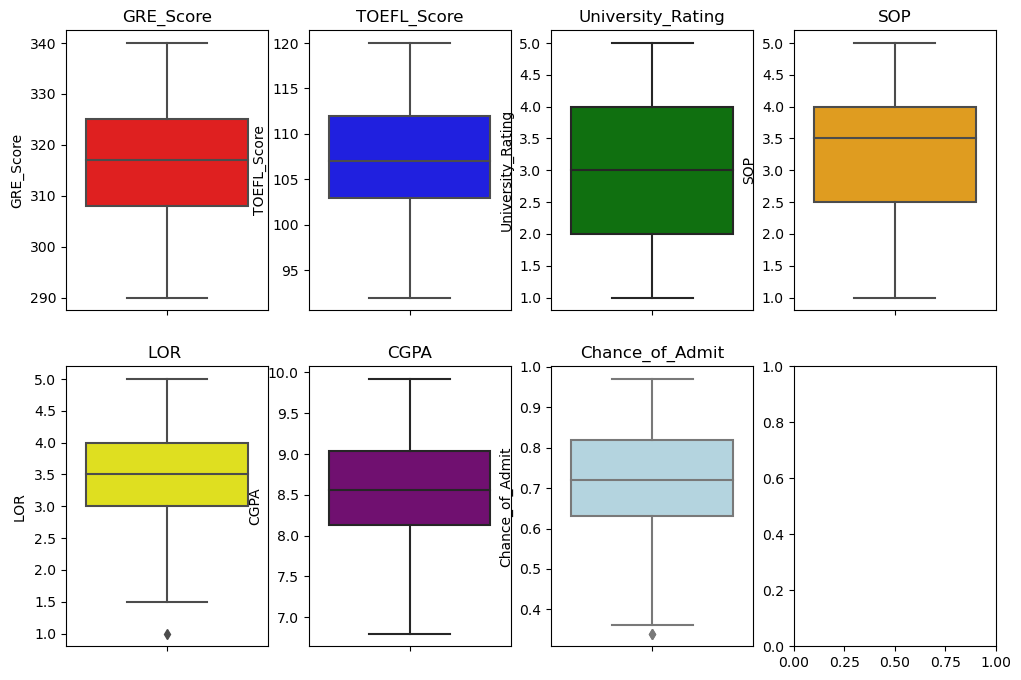

In [13]:
columns = ['Red', 'Blue', 'Green', 'Orange', 'Yellow', 'Purple', 'lightblue']
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, col in enumerate(df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.boxplot(data=df, y=col, color=columns[i % len(columns)], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')


In [14]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance_of_Admit'],
      dtype='object')

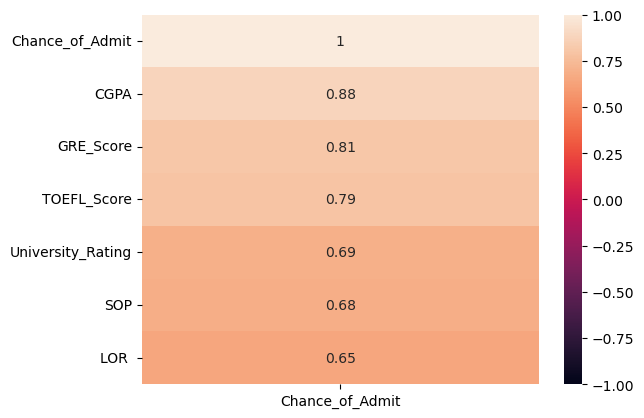

In [15]:
sns.heatmap(df.corr()[['Chance_of_Admit']].sort_values(by='Chance_of_Admit',ascending=False),vmin=-1,annot=True);

### Treating outliers

In [16]:
def oulier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [17]:
df.columns[1]

'TOEFL_Score'

In [18]:
for i in df.columns:
    UL,LL = oulier_limit(df[i])
    df[i] = np.where((df[i]>UL)| (df[i]<LL),np.nan,df[i])

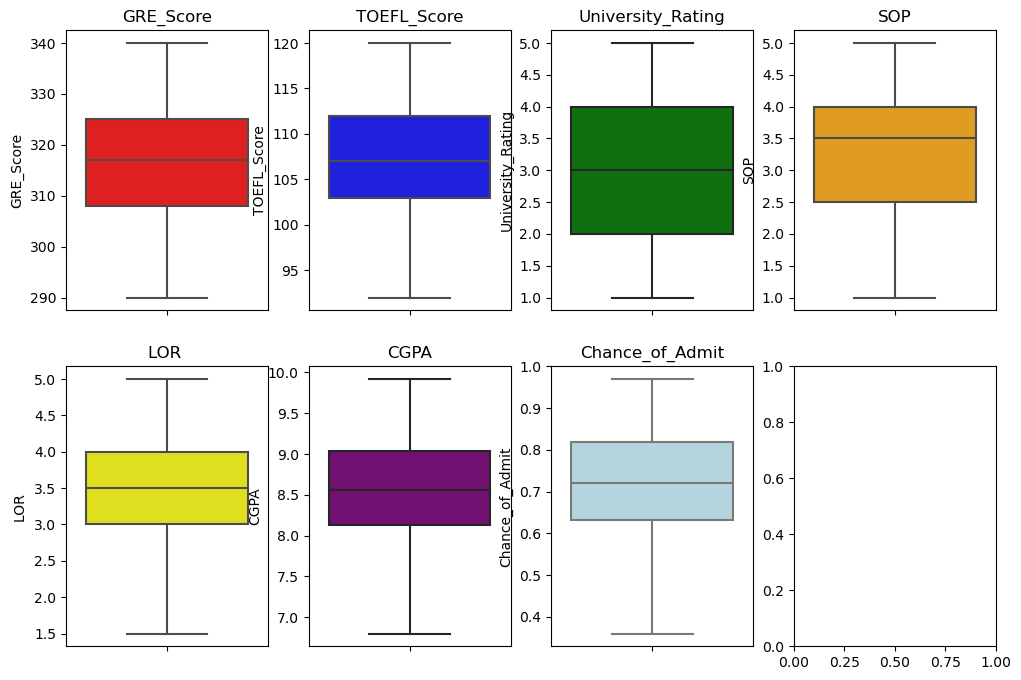

In [19]:
columns = ['Red', 'Blue', 'Green', 'Orange', 'Yellow', 'Purple', 'lightblue']
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, col in enumerate(df.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx][col_idx]
    sns.boxplot(data=df, y=col, color=columns[i % len(columns)], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')

In [20]:
df.dropna(inplace=True)

In [21]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Chance_of_Admit'],
      dtype='object')

In [22]:
df1 =df[['GRE_Score', 'TOEFL_Score','University_Rating','CGPA','Chance_of_Admit']]

In [23]:
x = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

### splitting the data

### standard scaler

In [24]:
sc = StandardScaler()

In [25]:
x = sc.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 46,shuffle=True)

### model building

###### we choose AdaBoostRegressor

In [52]:
best_model = GradientBoostingRegressor().fit(x_train,y_train)
y_pred = best_model.predict(x_test)
score = r2_score(y_test,y_pred)
print("score before hyper parameter tuning is :{}".format(score))

score before hyper parameter tuning is :0.8076492702872189


In [29]:
ABG = AdaBoostRegressor(random_state=42)

In [30]:
ABG.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [31]:
y_pred = ABG.predict(x_test)

### Training score

In [32]:
ABG.score(x_train,y_train)

0.7916029337250647

### Testing score

In [33]:
ABG.score(x_test,y_test)

0.7288567289484803

In [34]:
r2_score(y_test,y_pred)

0.7288567289484803

### Let's try to boost the accuracy of the model by Hyper parameter tuning

In [35]:
parameters = {'n_estimators':[100,500,1000,2000],
'learning_rate' :[0.5,1.5,2.5]}

In [36]:
grid_abg = GridSearchCV(estimator=ABG,param_grid=parameters,cv=2,n_jobs=-1,verbose=3)

In [37]:
grid_abg.fit(x_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.5, 2.5],
                         'n_estimators': [100, 500, 1000, 2000]},
             verbose=3)

In [38]:
grid_abg.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

### let's do predictions using best parameters

In [39]:
grid_abg_tuned = AdaBoostRegressor(learning_rate = 0.5, n_estimators = 100)

In [40]:
grid_abg_tuned.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100)

In [41]:
y_pred_abg = grid_abg_tuned.predict(x_test)

### score after hyper parameter tuning

In [42]:
grid_abg_tuned.score(x_train,y_train)

0.8047310288704302

In [43]:
grid_abg_tuned.score(x_test,y_test)

0.753861461350234

##### we have improved the score slightly

In [56]:
score = r2_score(y_test,y_pred_abg)
print("r2_score after hyper parameter tuning is :{}".format(score))

r2_score after hyper parameter tuning is :0.753861461350234


#### r2_score increased

#### saving the result into a seperate dataframe

In [45]:
predict = grid_abg_tuned.predict(x)


In [46]:
Chance_of_Admit = df.Chance_of_Admit.values

In [47]:
PREDICT = pd.DataFrame(zip(Chance_of_Admit,predict),columns=['ACTUAL','PREDICTED'])

In [57]:
PREDICT.head()

,ACTUAL,PREDICTED
0,0.92,0.922857
1,0.76,0.755926
2,0.72,0.618680
3,0.80,0.725586
4,0.65,0.620052


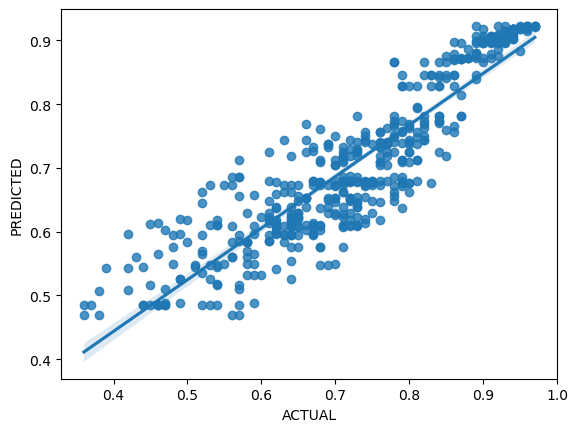

In [48]:
sns.regplot(data = PREDICT, x = 'ACTUAL',y = 'PREDICTED')
plt.show()